In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

d:\workdir\NLP_Project_AI23\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

model = TFAutoModelForSequenceClassification.from_pretrained(name)

tokenizer = AutoTokenizer.from_pretrained(name, truncation = True, max_length = 512, padding = True)

d:\workdir\NLP_Project_AI23\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mary\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [4]:
classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

Device set to use 0


In [5]:
df = pd.read_csv('..\data\IMDB Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df[df['sentiment'] == 'negative']

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
classifier([df['review'][7],
            df['review'][8],
            df['review'][10],
            df['review'][11],])

[{'label': 'NEGATIVE', 'score': 0.9996374845504761},
 {'label': 'NEGATIVE', 'score': 0.9997221827507019},
 {'label': 'NEGATIVE', 'score': 0.9986605644226074},
 {'label': 'NEGATIVE', 'score': 0.6564943194389343}]

In [7]:
classifier(['I really enjoyed this movie',
            'This movie was terrible',
            ])

[{'label': 'POSITIVE', 'score': 0.9998688697814941},
 {'label': 'NEGATIVE', 'score': 0.9996950626373291}]

- Change the labels in the dataset according to the model's labels' names;
- Perform train/test split;
- Apply the model on the test data to count Accuracy

In [8]:
df_lbld = df.copy()

In [9]:
df_lbld['sentiment'][df_lbld['sentiment'] == 'negative'] = 'NEGATIVE'

C:\Users\Mary\AppData\Local\Temp\ipykernel_15388\3008816577.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_lbld['sentiment'][df_lbld['sentiment'] == 'negative'] = 'NEGATIVE'


In [10]:
df_lbld['sentiment'][df_lbld['sentiment'] == 'positive'] = 'POSITIVE'

C:\Users\Mary\AppData\Local\Temp\ipykernel_15388\852750986.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_lbld['sentiment'][df_lbld['sentiment'] == 'positive'] = 'POSITIVE'


In [11]:
df_lbld['review'] = df_lbld['review'].str.replace('"', ' \' ')

Performing truncation task:
- tokenize everything;
- perform truncation+padding on tokenized data
- convert back to the texts
- clean-up the texts

In [12]:
tokenized = tokenizer(df_lbld['review'].tolist(), truncation=True, padding=True, return_tensors='tf')

In [13]:
tokenized

{'input_ids': <tf.Tensor: shape=(50000, 512), dtype=int32, numpy=
array([[ 101, 2028, 1997, ...,    0,    0,    0],
       [ 101, 1037, 6919, ...,    0,    0,    0],
       [ 101, 1045, 2245, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2572, ...,    0,    0,    0],
       [ 101, 1045, 1005, ...,    0,    0,    0],
       [ 101, 2053, 2028, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(50000, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [14]:
df_lbld['reviews'] = tokenized['input_ids'].numpy().tolist()
df_lbld['attention_mask'] = tokenized['attention_mask'].numpy().tolist()

In [15]:
df_lbld['reviews_decoded'] = df_lbld['reviews'].apply(lambda x: tokenizer.decode(x))

In [24]:
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'^\[CLS\]', '', regex=True)
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'\[SEP\]', '', regex=True)
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'\[PAD\]', '', regex=True)
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'< br / >', '', regex=True)

In [22]:
df_lbld.head()

,review,sentiment,reviews,attention_mask,reviews_decoded
0,One of the other reviewers has mentioned that ...,POSITIVE,"[101, 2028, 1997, 1996, 2060, 15814, 2038, 385...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",one of the other reviewers has mentioned that...
1,A wonderful little production. <br /><br />The...,POSITIVE,"[101, 1037, 6919, 2210, 2537, 1012, 1026, 7987...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",a wonderful little production. the filming ...
2,I thought this was a wonderful way to spend ti...,POSITIVE,"[101, 1045, 2245, 2023, 2001, 1037, 6919, 2126...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",i thought this was a wonderful way to spend t...
3,Basically there's a family where a little boy ...,NEGATIVE,"[101, 10468, 2045, 1005, 1055, 1037, 2155, 207...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",basically there's a family where a little boy...
4,Petter Mattei's ' Love in the Time of Money '...,POSITIVE,"[101, 9004, 3334, 4717, 7416, 1005, 1055, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",petter mattei's'love in the time of money'is ...


In [25]:
print(df_lbld['reviews_decoded'][0])

 one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.   the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.   it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many.. aryans, muslims, gangstas, latinos, christians, italians, irish and more.... so scuffles, death stares, dodgy dealings and shady agreements are never far away.   i would say the main appeal of the show is due to the fact that it goes where oth

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_lbld['reviews_decoded']
y = df_lbld['sentiment']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [27]:
X_train.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's  ' Love in the Time of Money '...
Name: review, dtype: object

In [30]:
X_test.head()

25000     this movie was bad from the start. the only p...
25001     god, i never felt so insulted in my whole lif...
25002     not being a fan of the coen brothers or georg...
25003     the movie andaz apna apna in my books is the ...
25004     i have to say i was really looking forward on...
Name: reviews_decoded, dtype: object

In [29]:
y_train.value_counts()

sentiment
NEGATIVE    12526
POSITIVE    12474
Name: count, dtype: int64

In [30]:
y_test.value_counts()

sentiment
POSITIVE    12526
NEGATIVE    12474
Name: count, dtype: int64

In [39]:
results = classifier(X_test.to_list())

In [43]:
results

[{'label': 'NEGATIVE', 'score': 0.9997784495353699},
 {'label': 'NEGATIVE', 'score': 0.9979178309440613},
 {'label': 'POSITIVE', 'score': 0.9996669292449951},
 {'label': 'POSITIVE', 'score': 0.9986935257911682},
 {'label': 'POSITIVE', 'score': 0.6808695197105408},
 {'label': 'POSITIVE', 'score': 0.9995075464248657},
 {'label': 'NEGATIVE', 'score': 0.9992631077766418},
 {'label': 'NEGATIVE', 'score': 0.9091733694076538},
 {'label': 'POSITIVE', 'score': 0.9995811581611633},
 {'label': 'NEGATIVE', 'score': 0.9992327690124512},
 {'label': 'POSITIVE', 'score': 0.9874885082244873},
 {'label': 'POSITIVE', 'score': 0.9996540546417236},
 {'label': 'POSITIVE', 'score': 0.9951450228691101},
 {'label': 'POSITIVE', 'score': 0.9981289505958557},
 {'label': 'NEGATIVE', 'score': 0.7026602625846863},
 {'label': 'POSITIVE', 'score': 0.998002827167511},
 {'label': 'NEGATIVE', 'score': 0.9951753616333008},
 {'label': 'POSITIVE', 'score': 0.9924417734146118},
 {'label': 'NEGATIVE', 'score': 0.9308148026466

In [40]:
results_df = pd.DataFrame(results)
results_df.to_csv(r'..\data\results_distilbert_untuned.csv', index=False)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score



In [44]:

# Create list of predictions
y_pred = [result['label'] for result in results]


In [45]:
y_pred[:5]

['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE']

In [46]:
y_test[:5]

25000    NEGATIVE
25001    NEGATIVE
25002    POSITIVE
25003    POSITIVE
25004    NEGATIVE
Name: sentiment, dtype: object

In [47]:

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['NEGATIVE', 'POSITIVE'])
print(conf_matrix)


[[11521   953]
 [ 1794 10732]]


In [48]:
import seaborn as sns

import matplotlib.pyplot as plt


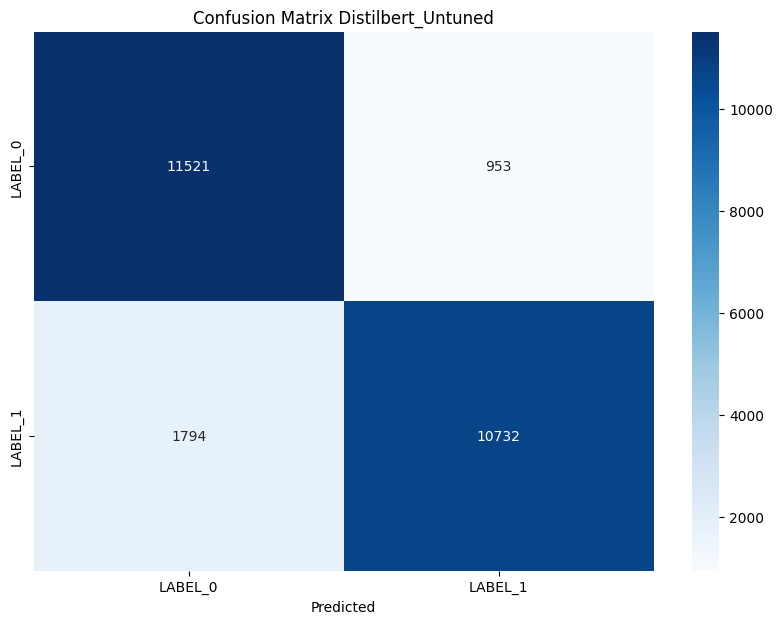

In [51]:

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LABEL_0', 'LABEL_1'], yticklabels=['LABEL_0', 'LABEL_1'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix Distilbert_Untuned')
plt.show()

In [50]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Save accuracy score to CSV
for_report = pd.DataFrame({'Model': ['distilbert untuned'], 'Notes': ['50/50 train-test split'], 'Accuracy': [accuracy]})
for_report.to_csv(r'..\results\for_report.csv', index=False)

Accuracy: 0.89012
